# TEST OF TENSORFLOW

In [141]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [142]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [143]:
data = pd.read_parquet('./data/train.parquet')
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585
...,...,...,...,...,...,...,...,...,...,...,...
928450,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,51.0,2021-08-08 18:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.951244
928453,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,1.0,2021-08-09 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.693147
928456,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,61.0,2021-08-09 08:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.127134
928459,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,44.0,2021-08-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.806662


In [144]:
df_ext = pd.read_csv(Path('submissions') / 'starting_kit' / 'external_data.csv')
df_ext.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [145]:
data.isna().sum()

counter_id                   0
counter_name                 0
site_id                      0
site_name                    0
bike_count                   0
date                         0
counter_installation_date    0
counter_technical_id         0
latitude                     0
longitude                    0
log_bike_count               0
dtype: int64

In [146]:
def _encode_dates(X):
    #X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, 'year'] = X['date'].dt.year
    X.loc[:, 'month'] = X['date'].dt.month
    X.loc[:, 'day'] = X['date'].dt.day
    X.loc[:, 'weekday'] = X['date'].dt.weekday
    X.loc[:, 'hour'] = X['date'].dt.hour

    # Finally we can drop the original columns from the dataframe
    return X 

In [147]:
def confinement(X):
    date = pd.to_datetime(X['date'])
    X.loc[:, ['date_only']] = date
    new_date = [dt.date() for dt in X['date_only']]
    X.loc[:, ['date_only']] = new_date
    mask = ((X['date_only'] >= pd.to_datetime('2020/10/30').date())
        & (X['date_only'] <= pd.to_datetime('2020/12/15').date())
        | (X['date_only'] >= pd.to_datetime('2021/04/03').date())
        & (X['date_only'] <= pd.to_datetime('2021/05/03').date()))
    X['confi'] = np.where(mask, 1, 0)
    return X

def curfew(X):
    date = pd.to_datetime(X['date'])
    X.loc[:, ['date_only']] = date
    new_date = [dt.date() for dt in X['date_only']]
    X.loc[:, ['date_only']] = new_date
    X.loc[:, ['hour_only']] = date
    new_hour = [dt.hour for dt in X['hour_only']]
    X.loc[:, ['hour_only']] = new_hour
    mask = (
        #First curfew
        (X['date_only'] >= pd.to_datetime('2020/12/15').date())
        & (X['date_only'] < pd.to_datetime('2021/01/16').date())
        & ((X['hour_only'] >= 20) | (X['hour_only'] <= 6))

        | 
        
        # Second curfew
        (X['date_only'] >= pd.to_datetime('2021/01/16').date())
        & (X['date_only'] < pd.to_datetime('2021/03/20').date())
        & ((X['hour_only'] >= 18) | (X['hour_only'] <= 6))

        |

        # Third curfew
        (X['date_only'] >= pd.to_datetime('2021/03/20').date())
        & (X['date_only'] < pd.to_datetime('2021/05/19').date())
        & ((X['hour_only'] >= 19) | (X['hour_only'] <= 6))

        |

        # Fourth curfew
        (X['date_only'] >= pd.to_datetime('2021/05/19').date())
        & (X['date_only'] < pd.to_datetime('2021/06/9').date())
        & ((X['hour_only'] >= 21) | (X['hour_only'] <= 6))

        |

        # Fifth curfew
        (X['date_only'] >= pd.to_datetime('2021/06/9').date())
        & (X['date_only'] < pd.to_datetime('2021/06/20').date())
        & ((X['hour_only'] >= 21) | (X['hour_only'] <= 6))
        )
    X['curfew'] = np.where(mask, 1, 0)

    return X.drop(columns=['hour_only', 'date_only'], inplace=True)

def counters_done(X):
    mask1 = (data['counter_name']=='152 boulevard du Montparnasse E-O') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
    mask1bis = (data['counter_name']=='152 boulevard du Montparnasse O-E') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
    mask2 = (data['counter_name']=='20 Avenue de Clichy SE-NO') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
    mask2bis = (data['counter_name']=='20 Avenue de Clichy NO-SE') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
    X.drop(X[mask1].index, inplace=True)
    X.drop(X[mask1bis].index, inplace=True)
    X.drop(X[mask2].index, inplace=True)
    X.drop(X[mask2bis].index, inplace=True)
    return X

__file__ = Path('submissions') /  'starting_kit' /  'estimator.py'


def _merge_external_data(X):
    file_path = Path(__file__).parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    #X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date', 't']].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X

In [148]:
data = _merge_external_data(data)
confinement(data)
curfew(data)
_encode_dates(data)

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,t,confi,curfew,year,month,day,weekday,hour
107,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,285.75,0,0,2020,9,1,1,2
157,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,283.95,0,0,2020,9,1,1,3
193,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,283.95,0,0,2020,9,1,1,4
769,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,293.65,0,0,2020,9,1,1,15
959,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,292.15,0,0,2020,9,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453515,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,51.0,2021-08-08 18:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.951244,293.05,0,0,2021,8,8,6,18
453934,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,1.0,2021-08-09 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.693147,288.65,0,0,2021,8,9,0,2
454316,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,61.0,2021-08-09 08:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.127134,287.15,0,0,2021,8,9,0,8
454411,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,44.0,2021-08-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.806662,289.75,0,0,2021,8,9,0,10


In [149]:
data_good = data.drop(columns=['counter_id', 'site_id',	'site_name', 'bike_count', 'date', 'counter_installation_date', 'counter_technical_id', 'latitude', 'longitude'])
data_good


counter_name_encoded = pd.get_dummies(data_good["counter_name"],prefix='counter_name',drop_first=True)

dataset = counter_name_encoded.join(data_good).drop(columns=['counter_name'])
dataset

,counter_name_152 boulevard du Montparnasse O-E,counter_name_18 quai de l'Hôtel de Ville NO-SE,counter_name_18 quai de l'Hôtel de Ville SE-NO,counter_name_20 Avenue de Clichy NO-SE,counter_name_20 Avenue de Clichy SE-NO,counter_name_254 rue de Vaugirard NE-SO,counter_name_254 rue de Vaugirard SO-NE,counter_name_27 quai de la Tournelle NO-SE,counter_name_27 quai de la Tournelle SE-NO,counter_name_28 boulevard Diderot E-O,...,counter_name_Voie Georges Pompidou SO-NE,log_bike_count,t,confi,curfew,year,month,day,weekday,hour
107,0,0,0,0,0,0,0,0,0,1,...,0,0.000000,285.75,0,0,2020,9,1,1,2
157,0,0,0,0,0,0,0,0,0,1,...,0,0.693147,283.95,0,0,2020,9,1,1,3
193,0,0,0,0,0,0,0,0,0,1,...,0,0.000000,283.95,0,0,2020,9,1,1,4
769,0,0,0,0,0,0,0,0,0,1,...,0,1.609438,293.65,0,0,2020,9,1,1,15
959,0,0,0,0,0,0,0,0,0,1,...,0,2.302585,292.15,0,0,2020,9,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453515,0,0,0,0,0,0,1,0,0,0,...,0,3.951244,293.05,0,0,2021,8,8,6,18
453934,0,0,0,0,0,0,1,0,0,0,...,0,0.693147,288.65,0,0,2021,8,9,0,2
454316,0,0,0,0,0,0,1,0,0,0,...,0,4.127134,287.15,0,0,2021,8,9,0,8
454411,0,0,0,0,0,0,1,0,0,0,...,0,3.806662,289.75,0,0,2021,8,9,0,10


In [150]:
import problem

X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

In [151]:
X_train = _merge_external_data(X_train)
confinement(X_train)
curfew(X_train)
_encode_dates(X_train)

X_train_good = X_train.drop(columns=['counter_id', 'site_id',	'site_name', 'date', 'counter_installation_date', 'counter_technical_id', 'latitude', 'longitude'])
counter_name_encoded_train = pd.get_dummies(X_train_good["counter_name"],prefix='counter_name',drop_first=True)
dataset_train = counter_name_encoded_train.join(X_train_good).drop(columns=['counter_name'])
dataset_train

,counter_name_152 boulevard du Montparnasse O-E,counter_name_18 quai de l'Hôtel de Ville NO-SE,counter_name_18 quai de l'Hôtel de Ville SE-NO,counter_name_20 Avenue de Clichy NO-SE,counter_name_20 Avenue de Clichy SE-NO,counter_name_254 rue de Vaugirard NE-SO,counter_name_254 rue de Vaugirard SO-NE,counter_name_27 quai de la Tournelle NO-SE,counter_name_27 quai de la Tournelle SE-NO,counter_name_28 boulevard Diderot E-O,...,counter_name_Voie Georges Pompidou NE-SO,counter_name_Voie Georges Pompidou SO-NE,t,confi,curfew,year,month,day,weekday,hour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,285.75,0,0,2020,9,1,1,1
30,1,0,0,0,0,0,0,0,0,0,...,0,0,285.75,0,0,2020,9,1,1,1
31,0,1,0,0,0,0,0,0,0,0,...,0,0,285.75,0,0,2020,9,1,1,1
32,0,0,1,0,0,0,0,0,0,0,...,0,0,285.75,0,0,2020,9,1,1,1
33,0,0,0,1,0,0,0,0,0,0,...,0,0,285.75,0,0,2020,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455129,0,0,0,0,0,0,0,0,0,0,...,0,0,291.45,0,0,2021,8,9,0,23
455130,0,0,0,0,0,0,0,0,0,0,...,0,0,291.45,0,0,2021,8,9,0,23
455119,0,0,0,0,0,0,0,0,0,0,...,0,0,291.45,0,0,2021,8,9,0,23
455136,0,0,0,0,0,0,0,0,0,0,...,1,0,291.45,0,0,2021,8,9,0,23


In [152]:
X_test = _merge_external_data(X_test)
confinement(X_test)
curfew(X_test)
_encode_dates(X_test)

X_test_good = X_test.drop(columns=['counter_id', 'site_id',	'site_name', 'date', 'counter_installation_date', 'counter_technical_id', 'latitude', 'longitude'])
counter_name_encoded_test = pd.get_dummies(X_test_good["counter_name"],prefix='counter_name',drop_first=True)
dataset_test = counter_name_encoded_test.join(X_test_good).drop(columns=['counter_name'])
dataset_test

,counter_name_152 boulevard du Montparnasse O-E,counter_name_18 quai de l'Hôtel de Ville NO-SE,counter_name_18 quai de l'Hôtel de Ville SE-NO,counter_name_20 Avenue de Clichy NO-SE,counter_name_20 Avenue de Clichy SE-NO,counter_name_254 rue de Vaugirard NE-SO,counter_name_254 rue de Vaugirard SO-NE,counter_name_27 quai de la Tournelle NO-SE,counter_name_27 quai de la Tournelle SE-NO,counter_name_28 boulevard Diderot E-O,...,counter_name_Voie Georges Pompidou NE-SO,counter_name_Voie Georges Pompidou SO-NE,t,confi,curfew,year,month,day,weekday,hour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,290.35,0,0,2021,8,10,1,1
31,1,0,0,0,0,0,0,0,0,0,...,0,0,290.35,0,0,2021,8,10,1,1
32,0,1,0,0,0,0,0,0,0,0,...,0,0,290.35,0,0,2021,8,10,1,1
33,0,0,1,0,0,0,0,0,0,0,...,0,0,290.35,0,0,2021,8,10,1,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,290.35,0,0,2021,8,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41574,0,0,0,0,0,0,0,0,0,0,...,0,0,292.25,0,0,2021,9,9,3,23
41575,0,0,0,0,0,0,0,0,0,0,...,0,0,292.25,0,0,2021,9,9,3,23
41564,0,0,0,0,0,0,0,0,0,0,...,0,0,292.25,0,0,2021,9,9,3,23
41581,0,0,0,0,0,0,0,0,0,0,...,1,0,292.25,0,0,2021,9,9,3,23


In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_train[['t', 'month', 'day', 'weekday', 'year']])
scaled_features_df = pd.DataFrame(scaled_features, index=dataset_train.index, columns=['t', 'month', 'day', 'weekday', 'year'])
dataset_train = dataset_train.drop(columns=['t', 'month', 'day', 'weekday', 'year'])
dataset_train = dataset_train.join(scaled_features_df)
dataset_train 

,counter_name_152 boulevard du Montparnasse O-E,counter_name_18 quai de l'Hôtel de Ville NO-SE,counter_name_18 quai de l'Hôtel de Ville SE-NO,counter_name_20 Avenue de Clichy NO-SE,counter_name_20 Avenue de Clichy SE-NO,counter_name_254 rue de Vaugirard NE-SO,counter_name_254 rue de Vaugirard SO-NE,counter_name_27 quai de la Tournelle NO-SE,counter_name_27 quai de la Tournelle SE-NO,counter_name_28 boulevard Diderot E-O,...,counter_name_Voie Georges Pompidou NE-SO,counter_name_Voie Georges Pompidou SO-NE,confi,curfew,hour,t,month,day,weekday,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.119706,0.736581,-1.629701,-1.000283,-1.364391
30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.119706,0.736581,-1.629701,-1.000283,-1.364391
31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.119706,0.736581,-1.629701,-1.000283,-1.364391
32,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.119706,0.736581,-1.629701,-1.000283,-1.364391
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.119706,0.736581,-1.629701,-1.000283,-1.364391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,23,0.952779,0.453473,-0.724854,-1.500346,0.732928
455130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,23,0.952779,0.453473,-0.724854,-1.500346,0.732928
455119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,23,0.952779,0.453473,-0.724854,-1.500346,0.732928
455136,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,23,0.952779,0.453473,-0.724854,-1.500346,0.732928


In [154]:
from sklearn.preprocessing import PolynomialFeatures
poly_scaler = PolynomialFeatures(degree=2)
scaled_hour = scaler.fit_transform(dataset_train[['hour']])
print(scaled_hour)
scaled_hour_df = pd.DataFrame(scaled_hour, index=dataset_train.index, columns=['hour'])
dataset_train.drop(columns=['hour'], inplace=True)
dataset_train = dataset_train.join(scaled_hour_df)

[[-1.518]
 [-1.518]
 [-1.518]
 ...
 [ 1.661]
 [ 1.661]
 [ 1.661]]


In [155]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(dataset_train))
print(normalizer.mean.numpy())

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

[[ 0.018  0.018  0.018  0.018  0.018  0.013  0.013  0.018  0.018  0.018
   0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018
   0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018
   0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018
   0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018  0.018
   0.018  0.018  0.018  0.017  0.017  0.226  0.271  0.     0.    -0.
  -0.    -0.     0.   ]]


In [156]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 63)               127       
 tion)                                                           
                                                                 
 dense_21 (Dense)            (None, 64)                4096      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,448
Trainable params: 8,321
Non-trainable params: 127
_________________________________________________________________


In [157]:
%%time
history = dnn_model.fit(
    dataset_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=5)

Epoch 1/5
11380/11380 [==============================] - 24s 2ms/step - loss: 0.5934 - val_loss: 0.6419
Epoch 2/5
11380/11380 [==============================] - 17s 2ms/step - loss: 0.4479 - val_loss: 0.6062
Epoch 3/5
11380/11380 [==============================] - 16s 1ms/step - loss: 0.4124 - val_loss: 0.5675
Epoch 4/5
11380/11380 [==============================] - 25s 2ms/step - loss: 0.3924 - val_loss: 0.5584
Epoch 5/5
11380/11380 [==============================] - 27s 2ms/step - loss: 0.3822 - val_loss: 0.5534
CPU times: user 1min 48s, sys: 14.7 s, total: 2min 3s
Wall time: 1min 49s


AttributeError: 'History' object has no attribute 'get_params'

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_test[['t', 'u', 'rr24', 'month', 'day', 'weekday', 'year', 'hour']])
scaled_features_df = pd.DataFrame(scaled_features, index=dataset_test.index, columns=['t', 'u', 'rr24', 'month', 'day', 'weekday', 'year', 'hour'])
dataset_test.drop(columns=['t', 'u', 'rr24', 'month', 'day', 'weekday', 'year', 'hour'], inplace=True)
dataset_test = dataset_test.join(scaled_features_df)
dataset_test 

,counter_name_152 boulevard du Montparnasse O-E,counter_name_18 quai de l'Hôtel de Ville NO-SE,counter_name_18 quai de l'Hôtel de Ville SE-NO,counter_name_20 Avenue de Clichy NO-SE,counter_name_20 Avenue de Clichy SE-NO,counter_name_254 rue de Vaugirard NE-SO,counter_name_254 rue de Vaugirard SO-NE,counter_name_27 quai de la Tournelle NO-SE,counter_name_27 quai de la Tournelle SE-NO,counter_name_28 boulevard Diderot E-O,...,confi,curfew,t,u,rr24,month,day,weekday,year,hour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.665842,0.788066,-0.605555,-0.640209,-0.671475,-0.982180,0.0,-1.520904
31,1,0,0,0,0,0,0,0,0,0,...,0,0,-0.665842,0.788066,-0.605555,-0.640209,-0.671475,-0.982180,0.0,-1.520904
32,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.665842,0.788066,-0.605555,-0.640209,-0.671475,-0.982180,0.0,-1.520904
33,0,0,1,0,0,0,0,0,0,0,...,0,0,-0.665842,0.788066,-0.605555,-0.640209,-0.671475,-0.982180,0.0,-1.520904
34,0,0,0,1,0,0,0,0,0,0,...,0,0,-0.665842,0.788066,-0.605555,-0.640209,-0.671475,-0.982180,0.0,-1.520904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41574,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.220084,1.488769,4.201738,1.561991,-0.783237,0.048554,0.0,1.661061
41575,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.220084,1.488769,4.201738,1.561991,-0.783237,0.048554,0.0,1.661061
41564,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.220084,1.488769,4.201738,1.561991,-0.783237,0.048554,0.0,1.661061
41581,0,0,0,0,0,0,0,0,0,0,...,0,0,-0.220084,1.488769,4.201738,1.561991,-0.783237,0.048554,0.0,1.661061


In [1]:
test_results = {}

dnn_model.evaluate(dataset_test, y_test, verbose=0)

NameError: name 'dnn_model' is not defined

In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
# Pour les années
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[['date']]).columns.tolist()[1:]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
year_encoder = StandardScaler()
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer([
    ('date', OneHotEncoder(handle_unknown="ignore"), date_cols),
    ('cat', categorical_encoder, categorical_cols),
    ('year', year_encoder, ['year'])
])

#preprocessor.fit_transform(X_train)

regressor = Ridge()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7fdeaab37d30>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'day', 'weekday',
                                                   'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name']),
                                                 ('year', StandardScaler(),
                                                  ['year'])])),
                ('ridge', Ridge())])

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test), squared=False):.2f}')

Train set, RMSE=0.80
Test set, RMSE=0.73


## Example of mask

In [7]:
mask = ((X_test['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N')
        & (X_test['date'] > pd.to_datetime('2021/09/01'))
        & (X_test['date'] < pd.to_datetime('2021/09/08')))

df_viz = X_test.loc[mask].copy()
df_viz['bike_count'] = np.exp(y_test[mask.values]) - 1
df_viz['bike_count (predicted)'] = np.exp(pipe.predict(X_test[mask])) -  1

Text(0, 0.5, 'bike_count')

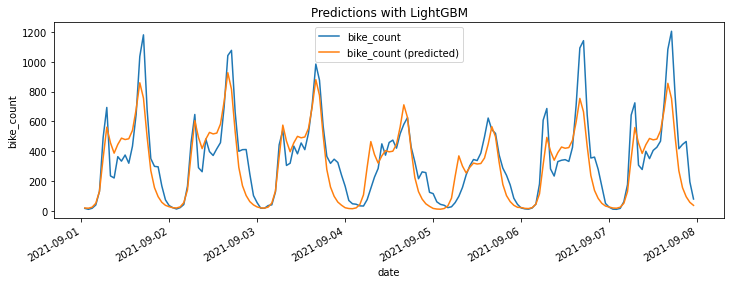

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='bike_count', ax=ax)
df_viz.plot(x='date', y='bike_count (predicted)', ax=ax)
ax.set_title('Predictions with LightGBM')
ax.set_ylabel('bike_count')

In [9]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

cv = TimeSeriesSplit(n_splits=6)

# When using a scorer in scikit-learn it always needs to be better when smaller, hence the minus sign.
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
print('RMSE: ', scores)
print(f'RMSE (all folds): {-scores.mean():.3} ± {(-scores).std():.3}')

RMSE:  [-0.82872129 -1.01361234 -0.82012086 -1.08268358 -0.94019592 -1.4223016 ]
RMSE (all folds): 1.02 ± 0.204


## Using external data

In [10]:
df_ext = pd.read_csv(Path('submissions') / 'starting_kit' / 'external_data.csv')
df_ext.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


You can find the detailed documentation for each feature [in this PDF](https://donneespubliques.meteofrance.fr/client/document/doc_parametres_synop_168.pdf) (in French). Here the only feature we consider is the temperature. We will use [pandas.merge_asof](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.merge_asof.html) to merge on date, using the closest available date (since the sampling between the external data and the counter data).

In [11]:
# In this notebook we define the __file__ variable to be in the same conditions as when running the
# RAMP submission

__file__ = Path('submissions') /  'starting_kit' /  'estimator.py'


def _merge_external_data(X):
    file_path = Path(__file__).parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    print(df_ext)
    X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date', 't']].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X
    

In [12]:
X_train_merge = _merge_external_data(X_train)
columns_merge = X_train_merge.columns
columns_merge

      numer_sta                date    pmer  tend  cod_tend   dd   ff       t  \
0          7149 2021-01-01 00:00:00  100810    80         1  270  1.8  272.75   
1          7149 2021-01-01 03:00:00  100920   110         3  300  1.7  271.25   
2          7149 2021-01-01 06:00:00  100950    30         3  290  2.6  271.95   
3          7149 2021-01-01 09:00:00  101100   150         2  280  1.7  272.45   
4          7149 2021-01-01 12:00:00  101110    30         0   50  1.0  276.95   
...         ...                 ...     ...   ...       ...  ...  ...     ...   
3317       7149 2020-09-30 09:00:00  101540   -30         8  230  4.4  289.95   
3318       7149 2020-09-30 12:00:00  101320  -210         8  190  4.9  292.05   
3319       7149 2020-09-30 15:00:00  101140  -180         7  190  4.1  291.55   
3320       7149 2020-09-30 18:00:00  101020  -130         6  190  2.7  290.15   
3321       7149 2020-09-30 21:00:00  100880  -140         8  170  2.4  288.35   

          td   u  ...  hnua

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'date',
       'counter_installation_date', 'counter_technical_id', 'latitude',
       'longitude', 't'],
      dtype='object')

Similarly we can wrap this function into a FunctionTranformer to use it in a scikit-learn pipeline. Now let's see whether this additional feature improves the model,

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[['date']]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = HistGradientBoostingRegressor(random_state=0)

pipe =  make_pipeline(
    FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

ERROR! Session/line number was not unique in database. History logging moved to new session 323


## Feature importance

We can check the feature importances using the function [sklearn.inspection.permutation_importances](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html). Since the first step of our pipeline adds the temperature and extract the date components, we want to apply this transformation those steps, to check the importance of all features. Indeed, we can perform sklearn.inspection.permutation_importances at any stage of the pipeline.

In [15]:
merger = pipe[:2]
X_train_augmented = merger.transform(X_train)
X_test_augmented = merger.transform(X_test)

predictor = pipe[2:]
_ = predictor.fit(X_train_augmented, y_train)

      numer_sta                date    pmer  tend  cod_tend   dd   ff       t  \
0          7149 2021-01-01 00:00:00  100810    80         1  270  1.8  272.75   
1          7149 2021-01-01 03:00:00  100920   110         3  300  1.7  271.25   
2          7149 2021-01-01 06:00:00  100950    30         3  290  2.6  271.95   
3          7149 2021-01-01 09:00:00  101100   150         2  280  1.7  272.45   
4          7149 2021-01-01 12:00:00  101110    30         0   50  1.0  276.95   
...         ...                 ...     ...   ...       ...  ...  ...     ...   
3317       7149 2020-09-30 09:00:00  101540   -30         8  230  4.4  289.95   
3318       7149 2020-09-30 12:00:00  101320  -210         8  190  4.9  292.05   
3319       7149 2020-09-30 15:00:00  101140  -180         7  190  4.1  291.55   
3320       7149 2020-09-30 18:00:00  101020  -130         6  190  2.7  290.15   
3321       7149 2020-09-30 21:00:00  100880  -140         8  170  2.4  288.35   

          td   u  ...  hnua

In [16]:
from sklearn.inspection import permutation_importance
feature_importances = permutation_importance(
    predictor, X_train_augmented[:20000], y_train[:20000], n_repeats=10, random_state=0
)